# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 8 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [1]:
### BEGIN YOUR CODE

Student_ID = 17

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [2]:
datasets = [('Combined Cycle Power Plant','https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant'), ('Beijing PM2.5','https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data'), ('Airfoil Self-Noise','https://archive.ics.uci.edu/dataset/291/airfoil+self+noise'), ('Energy Efficiency','https://archive.ics.uci.edu/dataset/242/energy+efficiency'), ('Bike Sharing','https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset'), ('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Auto MPG' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/9/auto+mpg


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [13]:
### BEGIN YOUR CODE

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [24]:
### BEGIN YOUR CODE

!wget https://archive.ics.uci.edu/static/public/9/auto+mpg.zip

!unzip auto+mpg.zip
# !tar ...
# !gunzip ...

dataset = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None,
                      names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

dataset.head()
### END YOUR CODE

--2025-04-26 10:01:27--  https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto+mpg.zip.5’

auto+mpg.zip.5          [ <=>                ]  14.52K  --.-KB/s    in 0.04s   

2025-04-26 10:01:28 (374 KB/s) - ‘auto+mpg.zip.5’ saved [14873]

Archive:  auto+mpg.zip
replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Index                   
  inflating: auto-mpg.data           
  inflating: auto-mpg.data-original  
  inflating: auto-mpg.names          


<ipython-input-24-11af18df7c14>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None,


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


####  3. Посмотреть на общую картину (0.5 балла)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [18]:
### BEGIN YOUR CODE

print("Размер датасета в МБ:", round(dataset.memory_usage(deep=True).sum() / (1024 * 1024), 2), "MB")
print("Количество записей (объектов):", dataset.shape[0])
print("Количество признаков (фич):", dataset.shape[1])
print("Типы данных:\n", dataset.dtypes)
print("Пропущенные значения:\n", dataset.isnull().sum())
print("\nСтатистическое описание числовых данных:\n", dataset.describe())

### END YOUR CODE

Размер датасета в МБ: 0.07 MB
Количество записей (объектов): 398
Количество признаков (фич): 9
Типы данных:
 mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object
Пропущенные значения:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Статистическое описание числовых данных:
               mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.

**Каков размер датасета? (в Мб)
Размер датасета составляет около 0.07 МБ.**

**Сколько в нем записей (объектов)?
В датасете содержится 398 записей.**

**Сколько признаков (фич) у объектов в датасете?
У объектов в датасете 9 признаков: mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name.**

**Есть ли категориальные данные? Какие?
Да, категориальные данные есть:
origin (числовой код страны, можно интерпретировать как категорию)
car_name (название автомобиля — текстовые данные).**

**Есть ли пропущенные значения?
Нет, пропущенные значения отсутсвуют.**

**Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
Да, целевой столбец — mpg, тип данных — float64.**

**Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
Регрессионная модель может решать задачу предсказания расхода топлива (величины mpg — миль на галлон) на основе характеристик автомобиля.**

**Для получения базовой статистики по числовым признакам используется функция:
dataset.describe()
Она выводит такие характеристики по каждому числовому признаку:
count — количество непустых значений,
mean — среднее значение,
std — стандартное отклонение,
min — минимальное значение,
25% — первый квартиль,
50% — медиана (второй квартиль),
75% — третий квартиль,
max — максимальное значение.**

**Расход топлива (mpg) варьируется от 9.0 до 46.6 миль на галлон, что показывает разнообразие автомобилей от "пожирателей бензина" до очень экономичных моделей.**

**Мощность (horsepower) сильно различается: от 46 до 230.**

**Вес автомобилей (weight) изменяется от 1613 до 5140 фунтов — большая разница между лёгкими и тяжёлыми машинами.**

**В датасете представлены автомобили разных годов выпуска (model_year) от 1970 до 1982, что отражает изменения в дизайне и требованиях к автомобилям за десятилетие.**

**В категориальном признаке car_name много уникальных значений (разные модели машин).***
<!-- Размер датасета составляет 100500 килобайт, что соответствует 100,5 мегабайтам. В датасете содержится описание ... -->

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками, постройте корреляционную матрицу. Некоторые из признаков могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

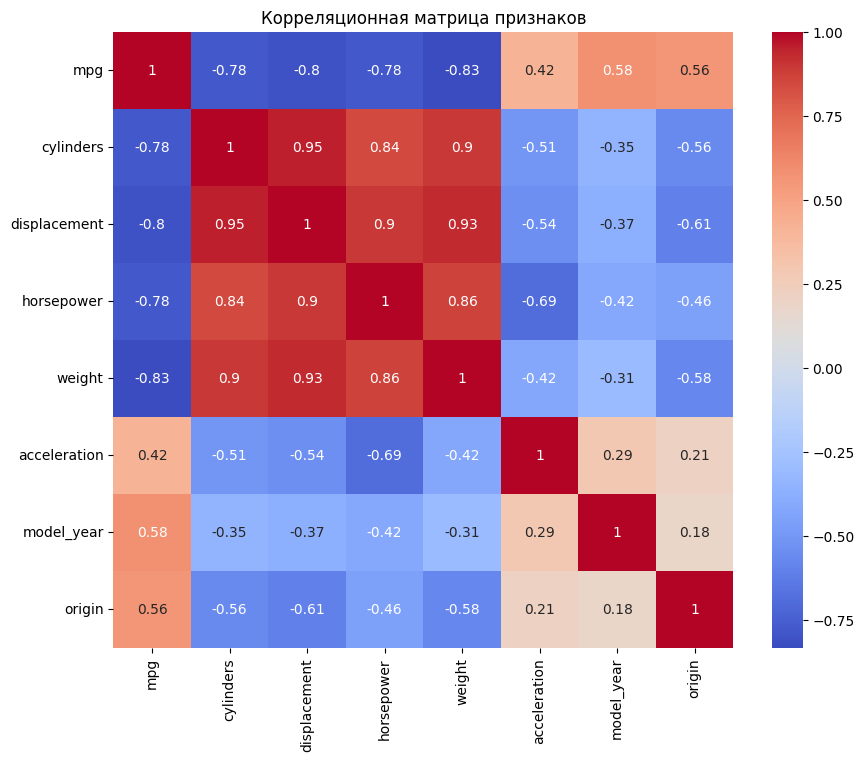

In [30]:
### BEGIN YOUR CODE

# Отделяем признаки и целевую переменную
dataset['horsepower'] = dataset['horsepower'].replace('?', np.nan)
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'])
dataset_numeric = dataset.drop(columns=['car_name'])
X = dataset_numeric.drop(columns=['mpg'])
y = dataset_numeric['mpg']

# 1. Анализ данных: Корреляционная матрица
corr_matrix = dataset_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

# Разделение данных на обучающую и тестовую выборки
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in splitter.split(X, dataset['origin']):  # стратификация по "origin"
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# 3. Пайплайн обработки данных

# Числовые и категориальные признаки
numeric_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
categorical_features = ['origin']

# Пайплайн для числовых данных
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # заполнение пропусков средним
    ('scaler', StandardScaler())  # нормализация
])

# Пайплайн для категориальных данных
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение пайплайнов
full_pipeline = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Применение пайплайна к обучающим данным
X_train_prepared = full_pipeline.fit_transform(X_train)

# Применение пайплайна к тестовым данным
X_test_prepared = full_pipeline.transform(X_test)

### END YOUR CODE

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [39]:
class LinearRegressionModel:
    """
    Линейная регрессия: обучение через градиентный спуск и нормальные уравнения
    """

    def __init__(self, alpha=0.01):
        """
        Инициализация модели
        """
        self.theta = None  # параметры модели
        self.alpha = alpha  # скорость обучения (можно передавать при создании)
        self.cost  = 0      # значение функции стоимости (MSE)

    def compute_cost(self, X, y, theta):
        """
        Функция стоимости (MSE)
        """
        m = len(y)
        predictions = X.dot(theta)
        cost = (1/(2*m)) * np.sum((predictions - y)**2)
        return cost

    def gradient_descent(self, X_train, y_train, theta, alpha, iters):
        """
        Реализация градиентного спуска
        """
        m = len(y_train)

        for i in range(iters):
            predictions = X_train.dot(theta)  # предсказания
            errors = predictions - y_train    # ошибка
            gradients = (1/m) * (X_train.T.dot(errors))  # градиент функции стоимости
            theta = theta - alpha * gradients  # обновляем параметры

        cost = self.compute_cost(X_train, y_train, theta)  # финальное значение ошибки
        return theta, cost

    def fit_with_GD(self, X_train, y_train, iters=200):
        """
        Обучение модели методом градиентного спуска
        """
        # Добавляем столбец x0 (единицы)
        X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

        # Инициализация тета нулями
        self.theta = np.zeros(X_b.shape[1])

        # Запускаем градиентный спуск
        self.theta, self.cost = self.gradient_descent(X_b, y_train, self.theta, self.alpha, iters)
        return self.cost

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение через нормальные уравнения
        """
        # Добавляем столбец единиц
        X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

        # Формула нормальных уравнений
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

        # Считаем ошибку
        self.cost = self.compute_cost(X_b, y_train, self.theta)
        return self.cost

    def predict(self, X_test):
        """
        Предсказание с помощью обученной модели
        """
        X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # добавляем x0=1
        y_predict = X_b.dot(self.theta)
        return y_predict

    def __str__(self):
        """
        Вывод всех параметров модели при вызове print()
        """
        return f"Вектор параметров: {self.theta}\nФункция стоимости: {self.cost}"

# Пример создания модели:
my_model = LinearRegressionModel(alpha=0.0001)

cost = my_model.fit_with_GD(X_train_prepared, y_train, iters=500)

print(my_model)


Вектор параметров: [ 1.13964631 -0.27633872 -0.28537148 -0.27273629 -0.29453223  0.16149363
  0.20991102  0.61074579  0.24244153  0.28645899]
Функция стоимости: 265.41222578206555


* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

Text(0.5, 1.0, 'Зависимость суммарной ошибки на обучающей выборке от количества итераций')

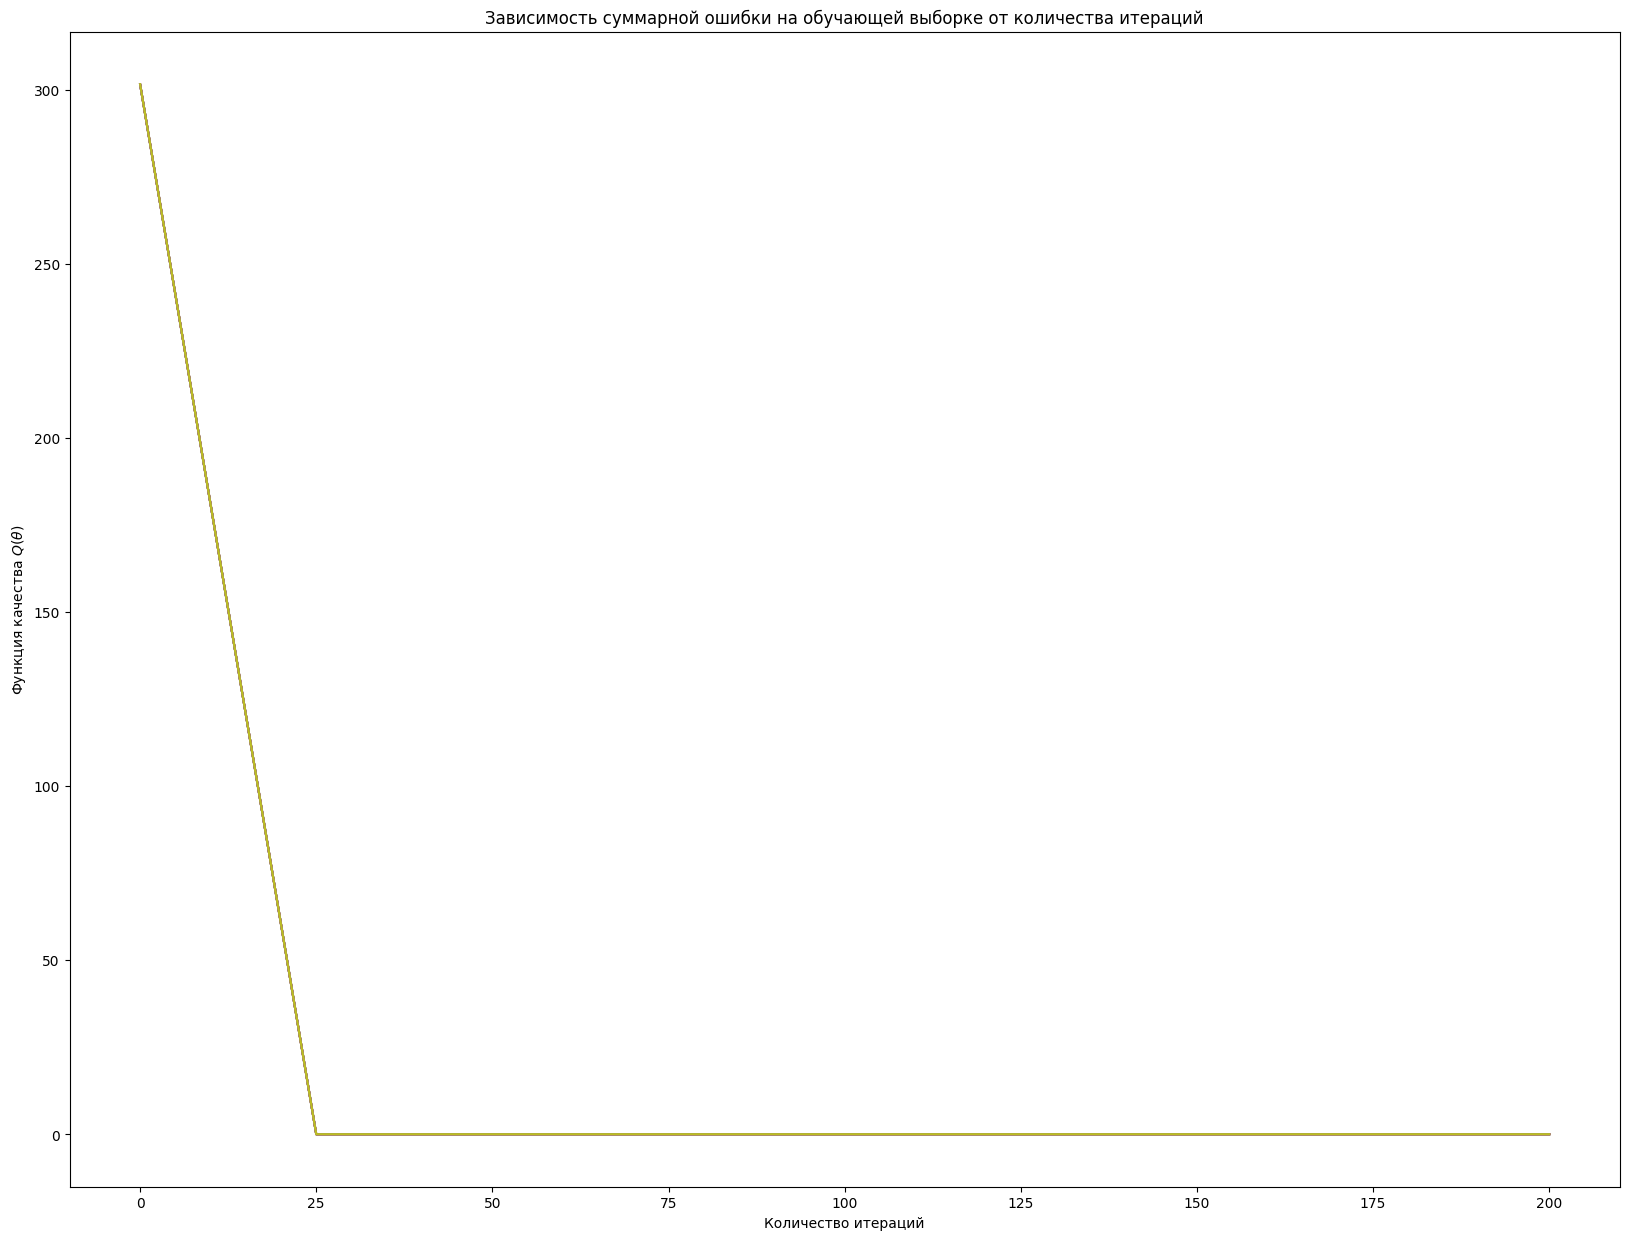

In [40]:
# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую
#

plt.figure(figsize=(20, 15))
# поместите сюда ваш код
iters = [0, 25, 50, 75, 100, 125, 150, 175, 200]

for i in range(0, 90, 10): # <- эти параметры имеет смысл подобрать самостоятельно
    my_model = LinearRegressionModel()  # создаём НОВУЮ модель каждый раз
    my_model.alpha = i / 100
    costs = []
    for j in iters:
        costs.append(my_model.fit_with_GD(X_train, y_train, j))
    plt.plot(iters, costs)


# не забудьте про легенду
plt.xlabel('Количество итераций')
plt.ylabel(r'Функция качества $Q(\theta)$')
plt.title('Зависимость суммарной ошибки на обучающей выборке от количества итераций')


*Здесь можно написать свои комментарии по поводу графика и выбора наиболее подходящей скорости обучения*

- - -
#### 6. Решить систему нормальных уравнений (метод наименьших квадратов) (0.5 балла)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует нормирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [ ]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train, y_train)

print(cost)
print(my_normal_equations_model)

- - -
#### 7. Сравнить разные методы (1.5 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?

+2 дополнительных балла за добавление к сравнению еще трех методов: встроенной реализации метода наименьших квадратов ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), гребневой регрессии (метод регуляризации Тихонова, [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)) и регрессии ([`LASSO`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).

In [ ]:
from sklearn.metrics import mean_squared_error

# Использование встроенной реализации метода стохастического градиентного спуска для построения модели
from sklearn.linear_model import SGDRegressor
my_sgd_model = SGDRegressor()
my_sgd_model.fit(X_train, y_train)
y_predict = my_sgd_model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
my_sgd_model_rmse = np.sqrt(mse)
print("SGD:", my_sgd_model_rmse)

# поместите сюда ваш код

*Здесь можно написать свои комментарии по поводу эффективности рассмотренных методов и качества их реализации*

- - -
#### 8. Опишите полученные результаты (0.5 балла)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

*Поместите сюда свой текст*

- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.